<a href="https://www.kaggle.com/code/aayushsin7a/nyc-taxi-fare-prediction?scriptVersionId=148489267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")
print("All the libraries loaded successfully")

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
All the libraries loaded successfully


In [2]:
datatype = {"key":"object","fare_amount":"float64","pickup_datetime":"object",
            "pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64","dropoff_latitude":"float64",
           "passenger_count":"int64"
           }

df = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/train.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=['pickup_datetime'])
df.drop(['key'],axis=1,inplace=True)

df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
# Print the shape of the dataset
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (100000, 7)


# Data Dictionary
- 

In [4]:
# Creatibng datetime features based on pickup_datetime

import calendar

df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_day'] = df['pickup_datetime'].apply(lambda x:x.day)
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x:x.hour)
df['pickup_day_of_week'] = df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month'] = df['pickup_datetime'].apply(lambda x:x.month)
df['pickup_year'] = df['pickup_datetime'].apply(lambda x:x.year)

df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
# Describe the data 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


# Observations 
- Minimum fare amount is negative
- Coordinates ( doesn't appear to be in range ); looks unreal, must be between -74 and 41. 
- Minimum passenger count is 0 

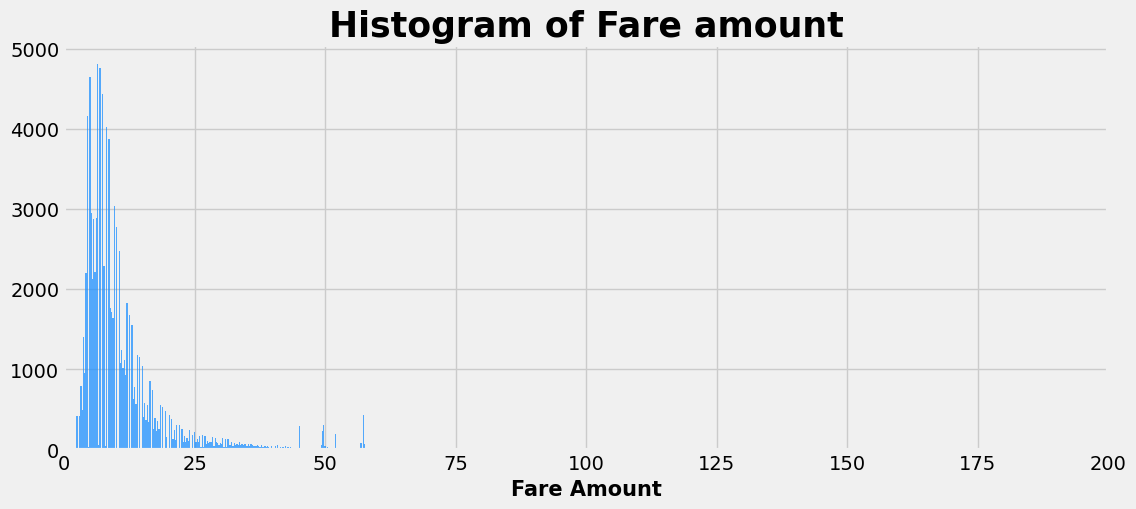

In [6]:
# Visualize the fare amount
plt.figure(figsize = (12,5))
n, bins, patches = plt.hist(df.fare_amount,1000, facecolor="dodgerblue",alpha=0.75)
plt.xlabel("Fare Amount", fontsize=15,fontweight='bold')
plt.title("Histogram of Fare amount",fontsize=25,fontweight='bold')
plt.xlim(0,200)
plt.show();

- Majority fare amount is b/w 0 to $25


In [7]:
# Remove 0 passenger count 
# the initial taxi fare is $2.5, so we can remove the fares below it

# Outlier treatment 

In [8]:
df = df[((df['pickup_longitude'] > - 78)&
        (df['pickup_longitude']< -70 ))&
        
        ((df['dropoff_longitude']> -78)&
        (df['dropoff_longitude']< -70))&
        
        ((df['pickup_latitude'] > 37) &
        (df['pickup_latitude']< 45))&
        
        ((df['dropoff_latitude']>37)&
        (df['dropoff_latitude']<45))&
        
        (df['passenger_count']>0)&
        (df['fare_amount']>=2.5)]

In [9]:
# Observe the change in the data 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000
mean,11.354236,-73.975142,40.751032,-73.974017,40.751466,1.680386,15.663000,13.492870,6.264144,2011.743267
std,9.698185,0.043751,0.036181,0.039904,0.037161,1.298536,8.676972,6.505561,3.451690,1.871159
min,2.500000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767677,-73.965127,40.768476,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [10]:
# Check for null values
df.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

Text(0.5, 1.0, 'Distribution of Fare in Log Scale')

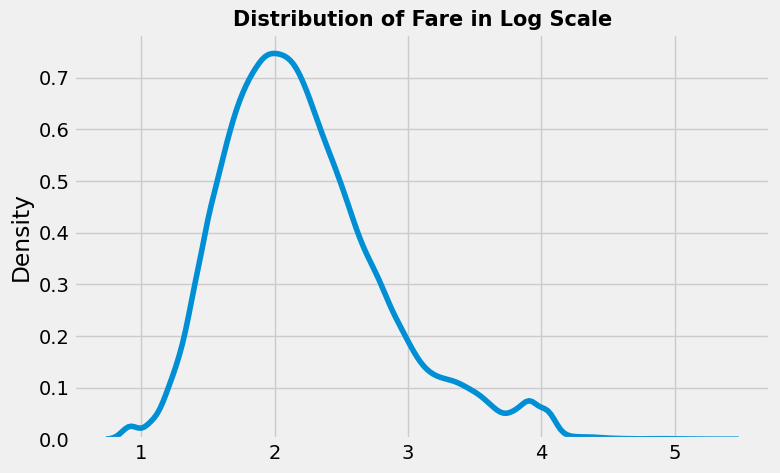

In [11]:
# Visualize the target variable
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df.fare_amount.values)).set_title((
    "Distribution of Fare in Log Scale"),fontsize=15, fontweight='bold')

- We apply log transformation to the check wheather the fare_amount is normally distributed or not 

In [12]:
# Analyzing the top 5 fare amount 
df.fare_amount.nlargest(5)

28373    200.00
1335     180.00
1483     165.00
43956    165.00
61163    160.77
Name: fare_amount, dtype: float64

In [13]:
df['fare_amount'].value_counts(normalize=True).iloc[:5]

fare_amount
6.5    0.048078
4.5    0.041630
8.5    0.038329
5.3    0.029267
5.7    0.028796
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

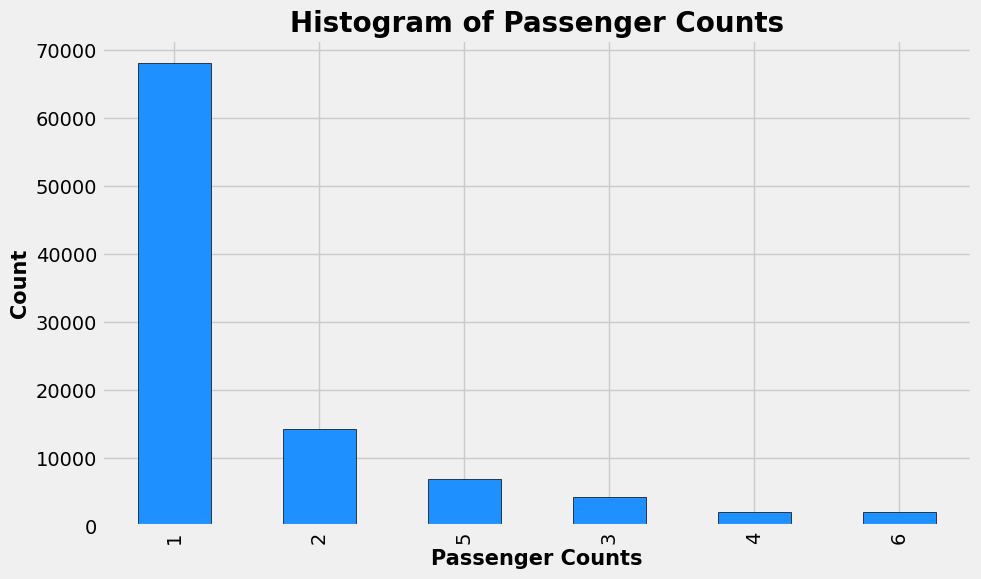

In [14]:
# Visualize Passenger Count 
plt.figure(figsize=(10,6))
df['passenger_count'].value_counts().plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Histogram of Passenger Counts",fontsize=20,fontweight='bold')
plt.xlabel("Passenger Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

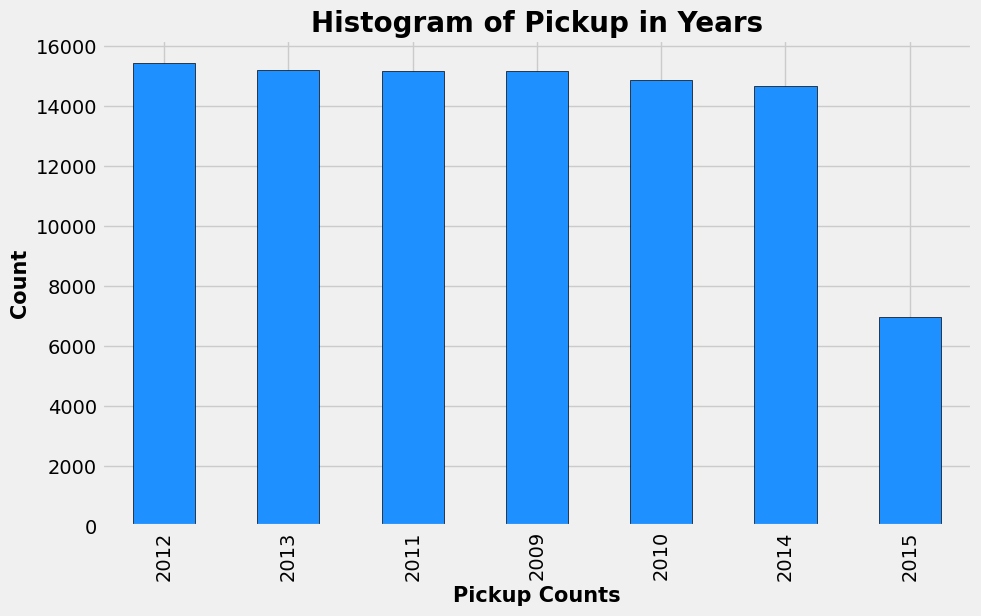

In [15]:
# Visualize Passenger Count 
plt.figure(figsize=(10,6))
df['pickup_year'].value_counts().plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Histogram of Pickup in Years",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

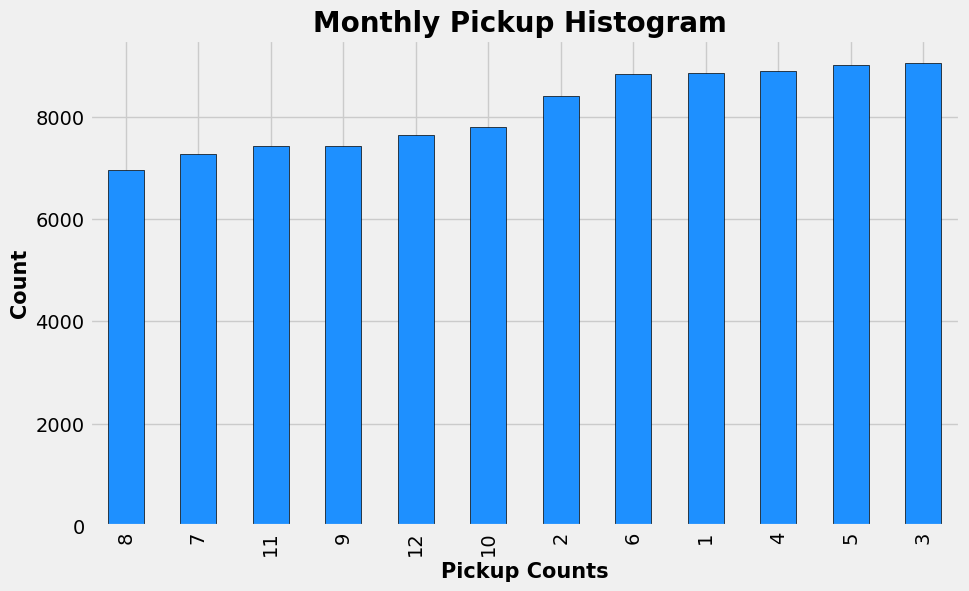

In [16]:
# Visualize Passenger Count 
plt.figure(figsize=(10,6))
df['pickup_month'].value_counts().sort_values(ascending=True).plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Monthly Pickup Histogram ",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

# to-do 
- will organize this month wise later

Text(0, 0.5, 'Count')

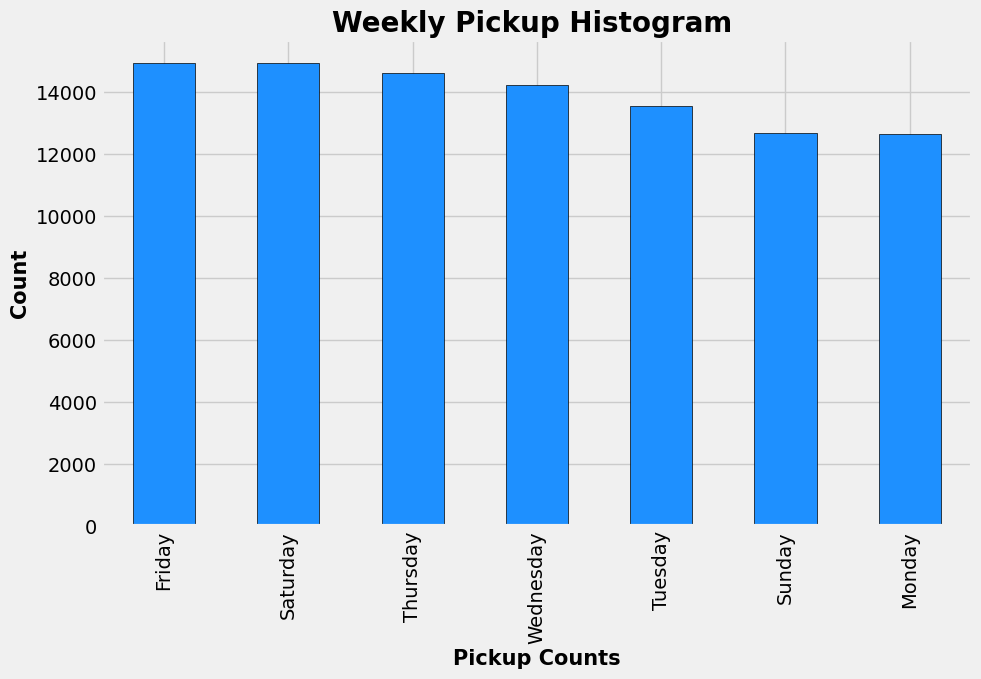

In [17]:
# Visualize Passenger Count 
plt.figure(figsize=(10,6))
df['pickup_day_of_week'].value_counts().sort_values(ascending=False).plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Weekly Pickup Histogram ",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

In [18]:
# '#no of passengers as per trips 
df['passenger_count'].value_counts()

passenger_count
1    68120
2    14293
5     6876
3     4214
4     2042
6     2004
Name: count, dtype: int64

- Single passenger has travelled the most

(-74.03, -73.75)

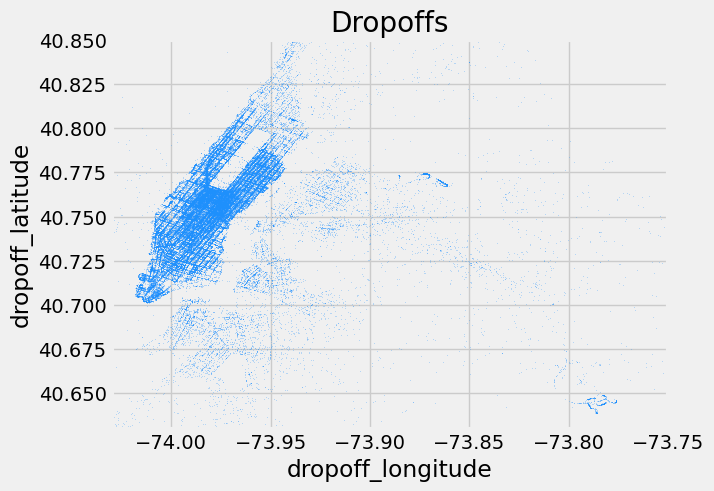

In [19]:
# Heatmap for Pickups and dropoffs in NYC
city_long = (-74.03,-73.75)
city_lat = (40.63, 40.85)

df.plot(kind='scatter',x='dropoff_longitude',y='dropoff_latitude',color='dodgerblue',s=.02,alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat)
plt.xlim(city_long)

- Maximum density of dropoffs has happened around (b/w longitude(-74.00,-73.95) and latitude (40.725,40.750,40,775)

(-74.03, -73.75)

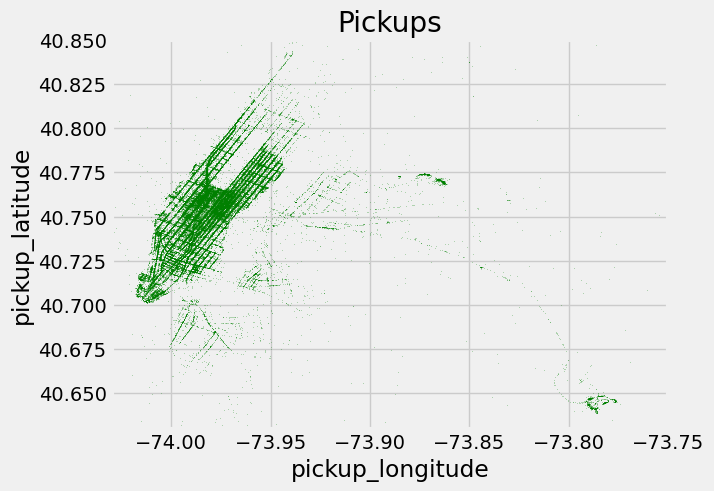

In [20]:
# Heatmap for Pickups and dropoffs in NYC
city_long = (-74.03,-73.75)
city_lat = (40.63, 40.85)

df.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',color='green',s=.02,alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat)
plt.xlim(city_long)

# We will calculate the distance b/w 2 geolocations using haversine distance formula 

- $haversin(dR)=haversin(ϕ2−ϕ1)+cosϕ1cosϕ2haversin(λ2−λ1)$



In [21]:
def distance(lat1,lon1,lat2,lon2):
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2-lat1)* p)/2 + np.cos(lat1 * p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [22]:
# add a new column to dataframe with distance in miles
df['distance_in_miles'] = distance(df.pickup_latitude,df.pickup_longitude, 
                                  df.dropoff_latitude,df.dropoff_longitude)

In [23]:
df.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_in_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411


Text(0.5, 1.0, 'Distribution of Distance in Miles')

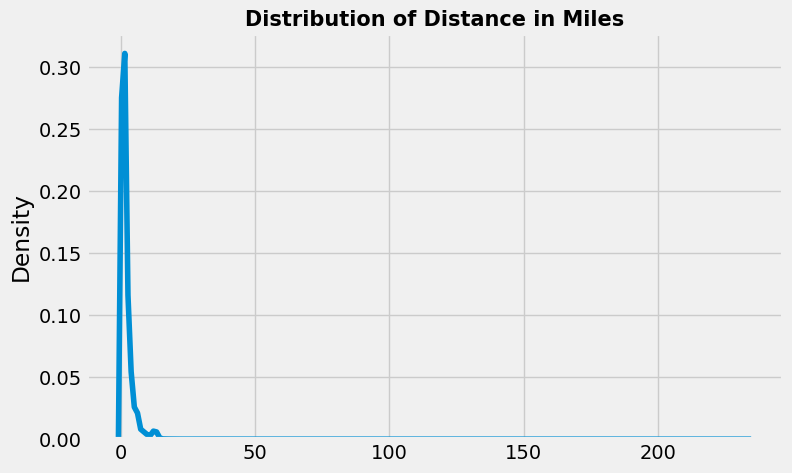

In [24]:
# Visualize the distance variable
plt.figure(figsize=(8,5))
sns.kdeplot(df.distance_in_miles.values).set_title((
    "Distribution of Distance in Miles"),fontsize=15, fontweight='bold')

- Majority of the distance travelled is between 0-20 miles. 

# Let's  Visualize this using Folium - openstreet maps 

In [25]:
#import folium
pickup_locations = folium.Map(location=[40.767937,-73.982155], tiles='OpenStreetMap', zoom_start=15)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                        fill_color='#FD8A6C').add_to(pickup_locations)
pickup_locations                         

# Visualize drop off locations

In [26]:
dropoff_locations = folium.Map(location=[40.767937,-73.982155], tiles='OpenStreetMap', zoom_start=15)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                        radius=3,
                        color='red',
                        popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                        fill_color='#FD8A6C').add_to(dropoff_locations)
dropoff_locations   

# Data-Preprocessing for Model Building